# Treinando uma rede DNN (Deep Neural Network) com o dataset mnist

In [68]:
from time import time
import tensorflow as tf
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from keras.callbacks import EarlyStopping
from IPython.display import display
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [2]:
# Permite visualizar o plot do matplolib na célula do Jupyter Notebook
%matplotlib inline

In [3]:
# Carregando o dataset de treino e de teste 
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
# Exibindo os shapes dos datasets de treino e teste
print(f"X train: {x_train.shape}")
print(f"Y train: {y_train.shape}")
print(f"X test: {x_test.shape}")
print(f"Y test: {y_test.shape}")

X train: (60000, 28, 28)
Y train: (60000,)
X test: (10000, 28, 28)
Y test: (10000,)


In [5]:
# Exibindo o primeiro número (em pixels) número do dataset de treino
display(pd.DataFrame(x_train[0].reshape(28, 28)))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


Número exibido: 5


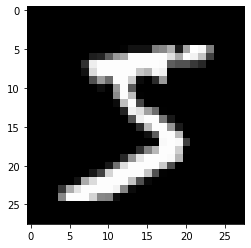

In [6]:
# Exibindo a imagem real
plt.imshow(x_train[0], cmap="gray", interpolation="nearest")
print(f"Número exibido: {y_train[0]}")
plt.show()

## Preparando os dados

In [7]:
# Deixo os dados no shape que a DNN espera
x_train = tf.reshape(x_train, (-1, 784))
x_test = tf.reshape(x_test, (-1, 784))

print("X train (novo shape): {0}".format(x_train.shape))
print("X test (novo shape): {0}".format(x_test.shape))

X train (novo shape): (60000, 784)
X test (novo shape): (10000, 784)


In [8]:
# Converto o dado para float32 (formato que a DNN espera)
x_train = tf.cast(x_train, dtype=tf.float32)
x_test = tf.cast(x_test, dtype=tf.float32)

In [9]:
# Deixo os dados todos na mesma escala (de 0.0 a 1.0)
x_train /= 255.
x_test /= 255.

Número exibido: 5


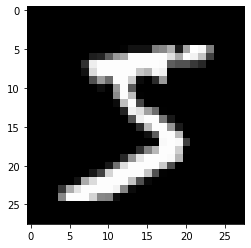

In [10]:
# Verifico que a as modificações não alteraram as informações do dataset
plt.imshow(tf.reshape(x_train[0], (28, 28)), cmap="gray", interpolation="nearest")
print("Número exibido: {0}".format(y_train[0]))
plt.show()

In [11]:
# Separando dados para validação do modelo
x_aux = x_train
y_aux = y_train

x_train = x_aux[:50000]
x_validation = x_aux[50000:]
y_train = y_aux[:50000]
y_validation = y_aux[50000:]

In [12]:
# Shape de todo o dataset que será utilizado no treinamento

# Para treinamento
print(f"X train: {x_train.shape}")
print(f"X test: {x_test.shape}")
print(f"X validation: {x_validation.shape}")
print(f"Y train: {y_train.shape}")
print(f"Y test: {y_test.shape}")
print(f"Y validation: {y_validation.shape}")

X train: (50000, 784)
X test: (10000, 784)
X validation: (10000, 784)
Y train: (50000,)
Y test: (10000,)
Y validation: (10000,)


## Construindo a DNN (Deep Neural Network)

In [13]:
# Defino o modelo
model = Sequential()

# Adiciona uma camada Densa com 512 neurônicos na camada de entrada. Inicializo os pesos da primeira camada com
# uma distribuição normal. A função de ativação da primeira camada é a relu.
model.add(Dense(input_shape = x_test.shape[1:], units = 512, kernel_initializer = "normal", activation = "relu"))

# Aplico a técnida de regularização Dropout com 25% de chance de um neurônio da primeira camada ser escolhido
model.add(Dropout(0.25))

# Adiciono mais uma camada densa com 256 neurônios na segunda camada. Inicializo os pesos da segunda camada com
# uma distribuição normal. A função de ativação da segunda camada é a relu.
model.add(Dense(256, kernel_initializer = "normal", activation = "relu"))

# Aplico a técnica de regularização Dropout com 25% de chance de um neurônio da segunda camada ser escolhido
model.add(Dropout(0.25))

# Adiciono mais uma camada densa com 64 neurônios na terceira camada. Inicializo os pesos da terceira camada com 
# uma distribuição normal. A função de ativação da terceira camada é a relu.
model.add(Dense(64, kernel_initializer = "normal", activation = "relu"))

# Por fim, adiciono a última camada (camada de saida - output) com 10 neurônios. A função de ativação da última 
# camada é a softmax. 
model.add(Dense(10, activation = "softmax"))

In [14]:
# Compilando o modelo
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

# Configuro o EarlyStopping para regularização
monitor = EarlyStopping(monitor= "val_loss",
                        patience=5,
                        min_delta = 1e-1,
                        verbose = 1,
                        mode = "auto")

In [15]:
# Iniciando o treinamento
start = time()

model.fit(x_train, 
          y_train,
          validation_data=(x_validation, y_validation),
          callbacks=[monitor],
          batch_size = 64,
          epochs = 100)

end = time()

Epoch 1/100
782/782 [==============================] - 11s 14ms/step - loss: 0.2945 - accuracy: 0.9112 - val_loss: 0.1124 - val_accuracy: 0.9672
Epoch 2/100
782/782 [==============================] - 11s 14ms/step - loss: 0.1256 - accuracy: 0.9619 - val_loss: 0.0910 - val_accuracy: 0.9712
Epoch 3/100
782/782 [==============================] - 11s 14ms/step - loss: 0.0963 - accuracy: 0.9707 - val_loss: 0.0881 - val_accuracy: 0.9736
Epoch 4/100
782/782 [==============================] - 11s 13ms/step - loss: 0.0749 - accuracy: 0.9765 - val_loss: 0.0811 - val_accuracy: 0.9752
Epoch 5/100
782/782 [==============================] - 11s 15ms/step - loss: 0.0644 - accuracy: 0.9798 - val_loss: 0.0678 - val_accuracy: 0.9794
Epoch 6/100
782/782 [==============================] - 11s 14ms/step - loss: 0.0573 - accuracy: 0.9821 - val_loss: 0.0729 - val_accuracy: 0.9794
Epoch 00006: early stopping


In [16]:
# Exibindo o tempo de treinamento
print("Tempo para o treinamento da rede: %.2f min" % ((end - start) / 60))

Tempo para o treinamento da rede: 1.11 min


## Avaliando o modelo 

In [17]:
# Exibindo a osi valores que a métrica que definimos (accuracy) proporciona 
model.metrics_names

['loss', 'accuracy']

In [18]:
# Verificando como o modelo se sai nos dados de teste
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0741 - accuracy: 0.9788


In [19]:
#Exibindo os valores da perda e da acurácia nos dados de teste
print("Loss: %.3f" % loss)
print("Accuracy: %.3f" % (accuracy * 100))

Loss: 0.074
Accuracy: 97.880


In [40]:
# prevendo os resultados dos dados de teste
result = model.predict(x_test)

predict_model = [np.argmax(x) for x in result]

In [41]:
# Exibindo o resultado das primeiras 10 previsões 
print("Resultado previsto: {0}".format(predict_model[:10]))
print("Valor real: {0}".format(y_test[:10]))

Resultado previsto: [7, 2, 1, 0, 4, 1, 4, 9, 5, 9]
Valor real: [7 2 1 0 4 1 4 9 5 9]


In [46]:
# Calculando as métricas
ac = accuracy_score(y_test, predict_model)
f1 = f1_score(y_test, predict_model, average = 'weighted')
rc = recall_score(y_test, predict_model, average = 'weighted')
pc = precision_score(y_test, predict_model, average = 'weighted')

In [52]:
# Exibindo as métricas

print("Accuracy score: ", ac)
print("F1 score: ", f1)
print("Recall score: ", rc)
print("Precision score: ", pc)

Accuracy score:  0.9788
F1 score:  0.978797006896643
Recall score:  0.9788
Precision score:  0.9789069339119058


In [66]:
# Imprimindo a matriz de confusão
confusion_matrix(y_test, predict_model)

array([[ 973,    1,    0,    0,    0,    1,    1,    1,    3,    0],
       [   0, 1130,    2,    0,    0,    0,    1,    0,    2,    0],
       [   4,    3, 1003,    5,    3,    0,    2,    6,    6,    0],
       [   1,    0,    3,  991,    0,    5,    0,    4,    4,    2],
       [   2,    0,    1,    1,  950,    0,    4,    2,    1,   21],
       [   2,    0,    0,    7,    1,  857,    5,    1,   16,    3],
       [   5,    2,    0,    0,    8,    4,  934,    0,    5,    0],
       [   1,    7,    4,    2,    1,    0,    0, 1002,    3,    8],
       [   3,    0,    1,    4,    2,    1,    0,    3,  958,    2],
       [   0,    3,    0,    0,    5,    4,    0,    4,    3,  990]])